# **Churn prediction project**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
!wget $data -O data-week-3.csv


--2021-12-07 12:02:19--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.02s   

2021-12-07 12:02:19 (45.9 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [ ]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ','_')

In [ ]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [ ]:
df.totalcharges = df.totalcharges.fillna(0)

In [ ]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [ ]:
df.churn = (df.churn == 'yes').astype(int)

###################################

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.churn.values
y_val = df_train.churn.values
y_test = df_train.churn.values

In [ ]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

# **EDA**


In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_full_train.churn.mean()

0.26996805111821087

In [ ]:
numerical = ['tenure' , 'monthlycharges', 'totalcharges']

In [ ]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [ ]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [ ]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [ ]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [ ]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [ ]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [ ]:
global_churn - churn_female

-0.006855983216553063

In [ ]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [ ]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [ ]:
global_churn - churn_partner

0.06493474245795922

In [ ]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [ ]:
global_churn - churn_no_partner

-0.05984095297455855

**risk ratio**

In [ ]:
churn_no_partner / global_churn

1.2216593879412643

In [ ]:
churn_partner / global_churn

0.7594724924338315

In [ ]:
from IPython.display import display

In [ ]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


**Mutual information**

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [ ]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [ ]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [ ]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [ ]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

**Correlation**

In [ ]:
df_full_train.tenure.max()

72

In [ ]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
dtype: float64

In [ ]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [ ]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()


0.3994413407821229

In [ ]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [ ]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [ ]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges  <= 50)].churn.mean()


0.18340943683409436

In [ ]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

**One-hot encoding** 

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

**Logistic regression**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-7, 7, 51)

sigmoid(10000)    

1.0

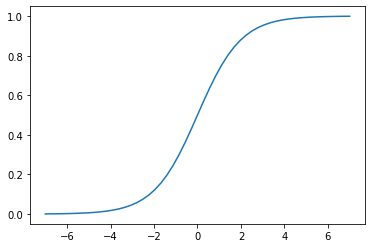

In [ ]:
plt.plot(z, sigmoid(z))

In [ ]:
def linear_regression(xi):
  result = w0

  for j in range(len(w)):
    result = result + xi[j] * w[j]

    return result

In [ ]:
def logistic_regression(xi):
  score = w0

  for j in range(len(w)):
    score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

**Training logistic regression with Scikit-Learn**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.intercept_[0]

-0.1900908219977011

In [ ]:
model.coef_[0]

array([ 0.90448488,  0.23114616, -1.30933796, ...,  0.03605706,
       -0.0545611 , -0.08516941])

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
y_val

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
(y_val == churn_decision).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


AttributeError: ignored

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

ValueError: ignored

In [ ]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [ ]:
df_pred.correct.mean()

AttributeError: ignored

df_pred.correct.mean()
0.8034066713981547

In [ ]:
churn_decision.astype(int)

**Model interpretation**

In [ ]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.904,
 'contract=one_year': 0.231,
 'contract=two_year': -1.309,
 'dependents=no': -0.113,
 'dependents=yes': -0.061,
 'deviceprotection=no': 0.003,
 'deviceprotection=no_internet_service': -0.12,
 'deviceprotection=yes': -0.057,
 'gender=female': -0.081,
 'gender=male': -0.093,
 'internetservice=dsl': -0.477,
 'internetservice=fiber_optic': 0.423,
 'internetservice=no': -0.12,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.236,
 'multiplelines=no_phone_service': 0.049,
 'multiplelines=yes': 0.013,
 'onlinebackup=no': 0.033,
 'onlinebackup=no_internet_service': -0.12,
 'onlinebackup=yes': -0.087,
 'onlinesecurity=no': 0.138,
 'onlinesecurity=no_internet_service': -0.12,
 'onlinesecurity=yes': -0.192,
 'paperlessbilling=no': -0.3,
 'paperlessbilling=yes': 0.127,
 'partner=no': -0.16,
 'partner=yes': -0.014,
 'paymentmethod=bank_transfer_(automatic)': -0.164,
 'paymentmethod=credit_card_(automatic)': -0.13,
 'paymentmethod=electronic_check': 0.103,
 'payme

In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'monthlycharges': 115.5, 'tenure': 72},
 {'contract': 'month-to-month', 'monthlycharges': 95.25, 'tenure': 10},
 {'contract': 'month-to-month', 'monthlycharges': 75.55, 'tenure': 5},
 {'contract': 'month-to-month', 'monthlycharges': 80.85, 'tenure': 5},
 {'contract': 'two_year', 'monthlycharges': 20.1, 'tenure': 18},
 {'contract': 'month-to-month', 'monthlycharges': 30.5, 'tenure': 4},
 {'contract': 'month-to-month', 'monthlycharges': 75.1, 'tenure': 1},
 {'contract': 'month-to-month', 'monthlycharges': 70.3, 'tenure': 1},
 {'contract': 'two_year', 'monthlycharges': 19.75, 'tenure': 72},
 {'contract': 'month-to-month', 'monthlycharges': 109.9, 'tenure': 6}]

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
dv_small.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
w0 = model_small.intercept_[0]
w0

-2.4767756644296837

In [ ]:
w = model_small.coef_[0]
w.round(3)


array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [ ]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [ ]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [ ]:
sigmoid(_)

0.030090303318277657

**Using the model**

In [ ]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')


In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision == y_test).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


AttributeError: ignored

In [ ]:
y_test

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
customer = dicts_test[-1]
customer

{'contract': 'month-to-month',
 'dependents': 'yes',
 'deviceprotection': 'yes',
 'gender': 'female',
 'internetservice': 'fiber_optic',
 'monthlycharges': 104.2,
 'multiplelines': 'yes',
 'onlinebackup': 'no',
 'onlinesecurity': 'yes',
 'paperlessbilling': 'yes',
 'partner': 'yes',
 'paymentmethod': 'electronic_check',
 'phoneservice': 'yes',
 'seniorcitizen': 0,
 'streamingmovies': 'yes',
 'streamingtv': 'yes',
 'techsupport': 'no',
 'tenure': 17,
 'totalcharges': '1743.5'}

In [ ]:
X_small = dv.transform([customer])

In [ ]:
model.predict_proba(X_small)[0, 1]

0.7138702775967599

In [ ]:
y_test[-1]

1